## GRIP Task 4

## Prediction using Decision Tree Algorithm
From the given ‘Iris’ dataset, predict the optimum number of clusters and
represent it visually. 

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
df=pd.read_csv("Downloads/Iris.csv")

In [6]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
df.shape

(150, 6)

In [10]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [11]:
#setting target value for Species
df['Species']=df['Species'].map({'Iris-setosa':0,'Iris-virginica':1,'Iris-versicolor':2}).astype('int')

In [12]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [13]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1]

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

<Figure size 432x288 with 0 Axes>

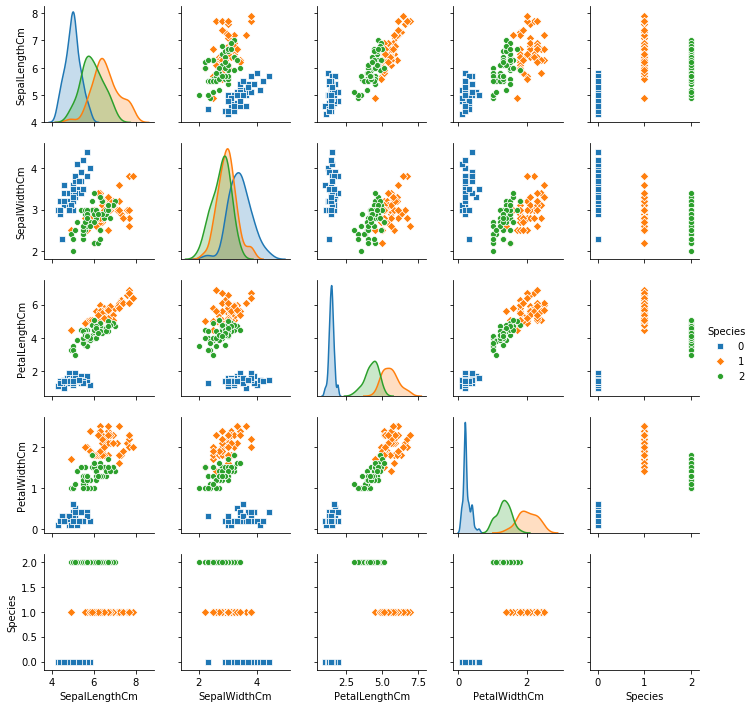

In [15]:
plt.figure()
sns.pairplot(df.drop("Id",axis=1),hue="Species",size=2,markers=['s','D','o'])
plt.show()

In [16]:
df=df.drop('Id',axis=1)

In [31]:
X=df.drop('Species',axis=1).values
y=df['Species'].values

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)

In [34]:
X_train.shape

(120, 4)

In [35]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
d_train=model.fit(X_train,y_train)

In [37]:
#Making a prediction
y_pred=model.predict(X_test)

In [38]:
#compare original and prdicted data
df1=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df1.head()

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,1,2
4,2,2


In [39]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [40]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  7,  1],
       [ 0,  0, 12]], dtype=int64)

In [41]:
accuracy_score(y_test,y_pred)

0.9666666666666667

Text(0.5, 1.0, 'decision tree')

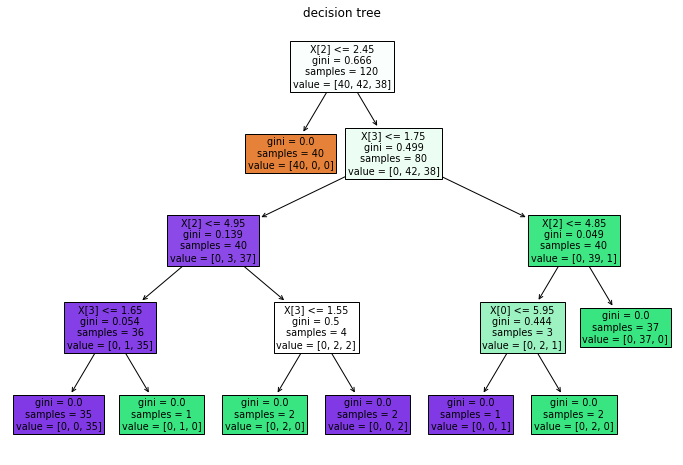

In [42]:
from sklearn import tree
plt.figure(figsize=(12,8))
tree.plot_tree(model,filled=True)
plt.title("decision tree")